<a href="https://colab.research.google.com/github/ktg6569/0704/blob/main/0704_python_%EA%B8%B0%EB%B3%B8_%ED%94%8C%EB%A3%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

미션 1


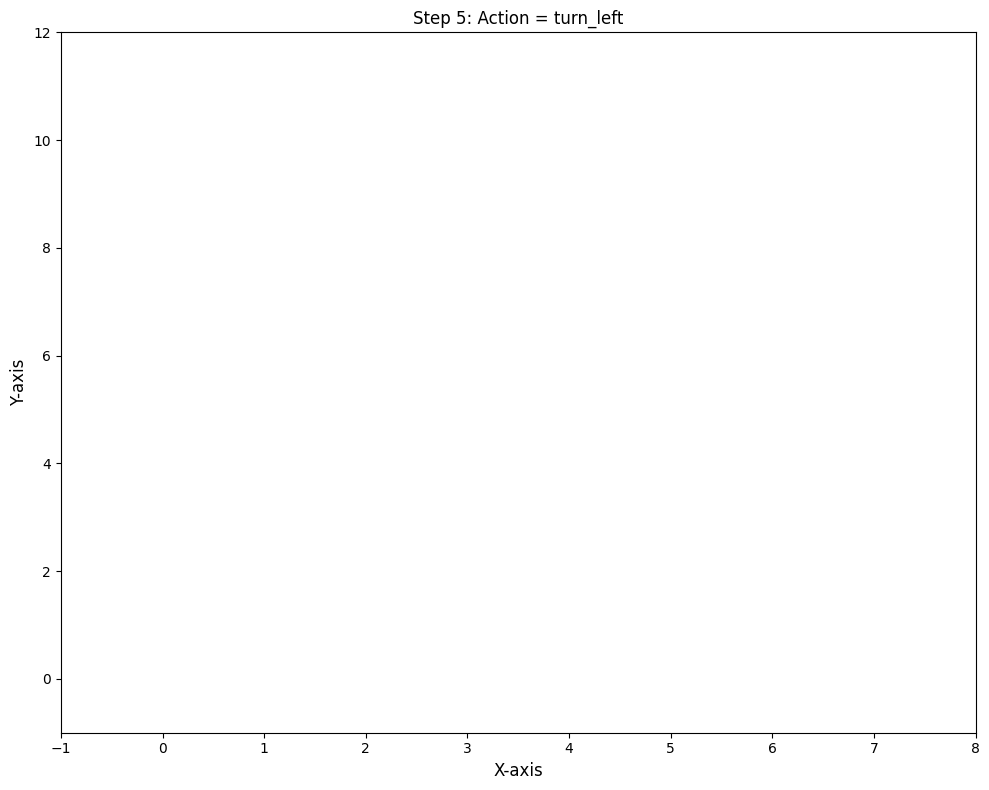

In [ ]:
import matplotlib.pyplot as plt

def setup_basic_plot(step_num=1, action="forward"):
    fig, ax = plt.subplots(figsize=(10, 8))

    # 축 범위 설정
    ax.set_xlim(-1, 8)
    ax.set_ylim(-1, 12)

    # 축 라벨 및 제목 설정
    ax.set_xlabel("X-axis", fontsize=12)
    ax.set_ylabel("Y-axis", fontsize=12)
    ax.set_title(f"Step {step_num}: Action = {action}", fontsize=12)

    return ax

if __name__ == "__main__":
    ax = setup_basic_plot(5, "turn_left")
    plt.tight_layout()
    plt.show()


Mission: 목표선 그리기 함수 만들기

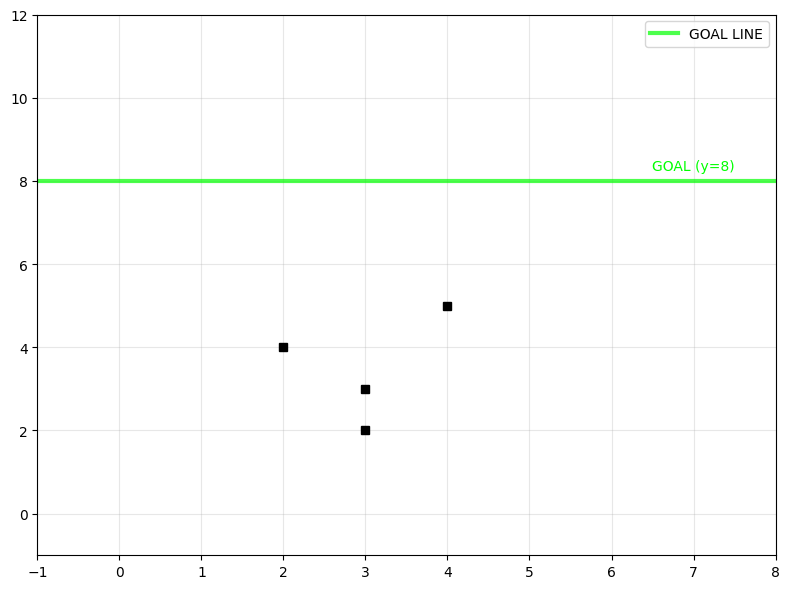

Returned goal_y: 8


In [ ]:
import matplotlib.pyplot as plt

def draw_goal_line(obstacles):
    fig, ax = plt.subplots(figsize=(8, 6))

    # 축 범위 설정
    ax.set_xlim(-1, 8)
    ax.set_ylim(-1, 12)

    # 격자 설정
    ax.grid(True, alpha=0.3)

    # 장애물이 있다면 Y 좌표 중 최대값 찾기
    goal_y = max([y for _, y in obstacles], default=0) + 3

    # 목표선 그리기
    ax.axhline(y=goal_y, color='lime', linewidth=3, alpha=0.7, label=f"GOAL LINE")

    # 텍스트 표시
    ax.text(7, goal_y + 0.2, f"GOAL (y={goal_y})", color='lime',
            ha='center', va='bottom')

    # 장애물 시각화 (선택 사항 - 시각적으로 보이게 하기)
    for x, y in obstacles:
        ax.plot(x, y, 'ks')  # 검정색 사각형

    # 범례, 레이아웃, 출력
    ax.legend()
    plt.tight_layout()
    plt.show()

    return goal_y

if __name__ == "__main__":
    obstacles = {(3, 2), (3, 3), (2, 4), (4, 5)}
    result = draw_goal_line(obstacles)
    print(f"Returned goal_y: {result}")


 Mission: 장애물 그리기 함수 만들기

Obstacle 1: position=(2, 4)
Obstacle 2: position=(3, 2)
Obstacle 3: position=(3, 3)
Obstacle 4: position=(4, 5)


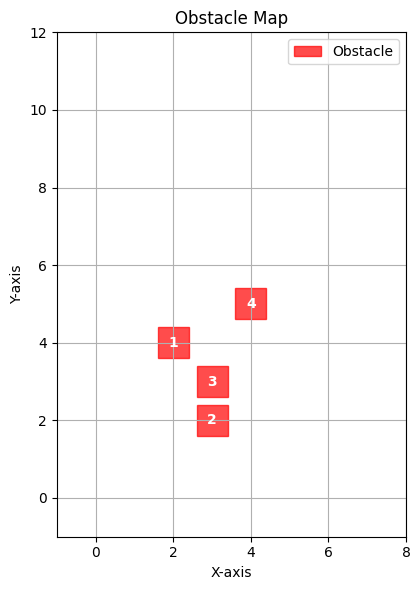

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def draw_obstacles(obstacles):
    # 캔버스 설정
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim(-1, 8)
    ax.set_ylim(-1, 12)
    ax.set_aspect('equal')
    ax.grid(True)
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_title("Obstacle Map")

    # 타입 확인 및 정렬된 리스트로 변환
    if isinstance(obstacles, set):
        obstacles = list(obstacles)
    obstacles = sorted(obstacles)

    # 장애물 그리기
    for idx, (x, y) in enumerate(obstacles):
        rect = Rectangle((x - 0.4, y - 0.4), 0.8, 0.8,
                         color='red', alpha=0.7,
                         label="Obstacle" if idx == 0 else None)
        ax.add_patch(rect)

        # 중앙에 텍스트 표시 (흰색, 굵은 글씨)
        ax.text(x, y, str(idx + 1), color='white', weight='bold',
                ha='center', va='center')

        # 콘솔 출력
        print(f"Obstacle {idx + 1}: position=({x}, {y})")

    # 범례 추가
    ax.legend()

    # 레이아웃 최적화 및 출력
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    obstacles = {(3, 2), (3, 3), (2, 4), (4, 5)}
    draw_obstacles(obstacles)


거리 텍스트 표시

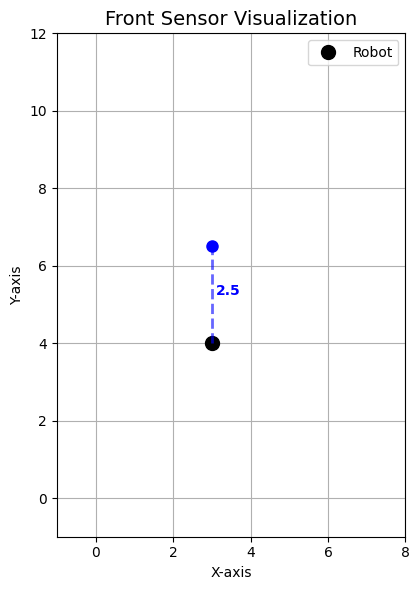

In [ ]:
import matplotlib.pyplot as plt

def draw_front_sensor(ax, x, y, sensors):
    sensor_length = 3
    front_reach = min(sensors['front'], sensor_length)

    # 센서 거리 텍스트 표시
    ax.text(x + 0.1, y + front_reach / 2,
            f'{sensors["front"]:.1f}', color='blue', fontweight='bold')

    # 센서 선 그리기 (점선)
    ax.plot([x, x], [y, y + front_reach], 'b--', linewidth=2, alpha=0.6)

    # 센서 끝점에 파란 원
    ax.plot(x, y + front_reach, 'bo', markersize=8)

if __name__ == "__main__":
    # 예시 센서 값
    sensors = {
        "front": 2.5
    }

    # 시작 위치
    x, y = 3, 4

    # 캔버스 설정
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim(-1, 8)
    ax.set_ylim(-1, 12)
    ax.set_aspect('equal')
    ax.grid(True)
    ax.set_title("Front Sensor Visualization", fontsize=14)
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")

    # 로봇 위치 표시 (예시로 동그라미)
    ax.plot(x, y, 'ko', markersize=10, label="Robot")
    ax.legend()

    # 센서 시각화
    draw_front_sensor(ax, x, y, sensors)

    # 출력
    plt.tight_layout()
    plt.show()
